# In this ipynb we will be learning the Linear regression with practicle implementation

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loadin the data
data = pd.read_csv("DataSet/House_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Dropping 'zipcode', 'lat', and 'long' columns as they require geo analysis, which is not within the scope of this project.
# we will also drop id

data.drop(columns=['id','zipcode','lat','long'],inplace=True)

In [5]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [6]:
data.shape

(21613, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [8]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


# Let us do the EDA And feature engineering

In [11]:
df=data.copy()


In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  sqft_living15  2161

In [15]:
# Let us compute the age of the house
df['year_sold']=df['date'].dt.year

In [16]:
df['price_per_sqFT']=df['price']/df['sqft_living']

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,price_per_sqFT
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,188.050847
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,209.338521
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,233.766234
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,308.163265
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,303.571429


In [18]:
df['house_age']=df.apply(lambda row: row['year_sold'] - row['yr_renovated'] if row['yr_renovated']>0
                         else row['year_sold'] - row['yr_built'],axis=1)

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318
condition,21613.0,3.40943,1.0,3.0,3.0,4.0,5.0,0.650743


In [20]:
# Display rows with negative house_age
negative_house_age = df[df['house_age'] <= 0]
print(negative_house_age.shape)


(534, 20)


In [21]:
# Remove rows with negative house_age
df = df[df['house_age'] > 0]


In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,price_per_sqFT,house_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,188.050847,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,209.338521,23
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,233.766234,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,308.163265,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,303.571429,28


In [23]:
#  droping unnecessary columns

df.drop(columns=['date','year_sold','yr_renovated'],inplace=True)

In [24]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price_per_sqFT,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,188.050847,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,209.338521,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,233.766234,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,308.163265,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,303.571429,28


In [25]:
df.nunique()

price              3816
bedrooms             13
bathrooms            30
sqft_living         996
sqft_lot           9632
floors                6
waterfront            2
view                  5
condition             5
grade                12
sqft_above          907
sqft_basement       302
yr_built            115
sqft_living15       753
sqft_lot15         8579
price_per_sqFT    16169
house_age           115
dtype: int64

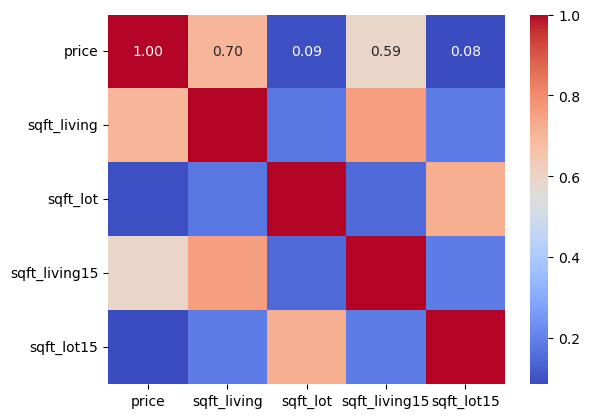

In [26]:
# Calculate the correlation matrix
corr_matrix = df[['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [27]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'price_per_sqFT', 'house_age'],
      dtype='object')

In [28]:
# Calculate Variance Inflation Factor (VIF) to assess multicollinearity between features.
# VIF quantifies how much the variance of a feature's estimated regression coefficient increases 
# due to multicollinearity with other features. High VIF values (typically > 10) indicate 
# that a feature is highly correlated with other features in the dataset, which can lead to 
# unreliable coefficient estimates and reduced model performance. By examining VIF values, 
# we can identify and address multicollinearity to improve model stability and interpretability.


from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['sqft_living', 'sqft_living15']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


         feature        VIF
0    sqft_living  14.292506
1  sqft_living15  14.292506


In [29]:
# Check correlation between sqft_living and sqft_living15
print(df[['sqft_living', 'sqft_living15']].corr())


               sqft_living  sqft_living15
sqft_living       1.000000       0.757027
sqft_living15     0.757027       1.000000


In [30]:
# As we saw that there is strong correlation between sqft_living and sqft_living15, it is 
# advisable to choose one of these features to avoid redundancy. Since sqft_living has a
#  higher correlation with the target variable (price), 
# it is generally a better choice to keep this feature:

df.drop(columns=['sqft_living15'], inplace=True)


In [31]:
# ALso we will drop sqft_lot15 and sqft_lotas it has weak coorelation with the price
df.drop(columns=['sqft_lot15','sqft_lot'],inplace=True)

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'price_per_sqFT', 'house_age'],
      dtype='object')

# Univariate Analysis

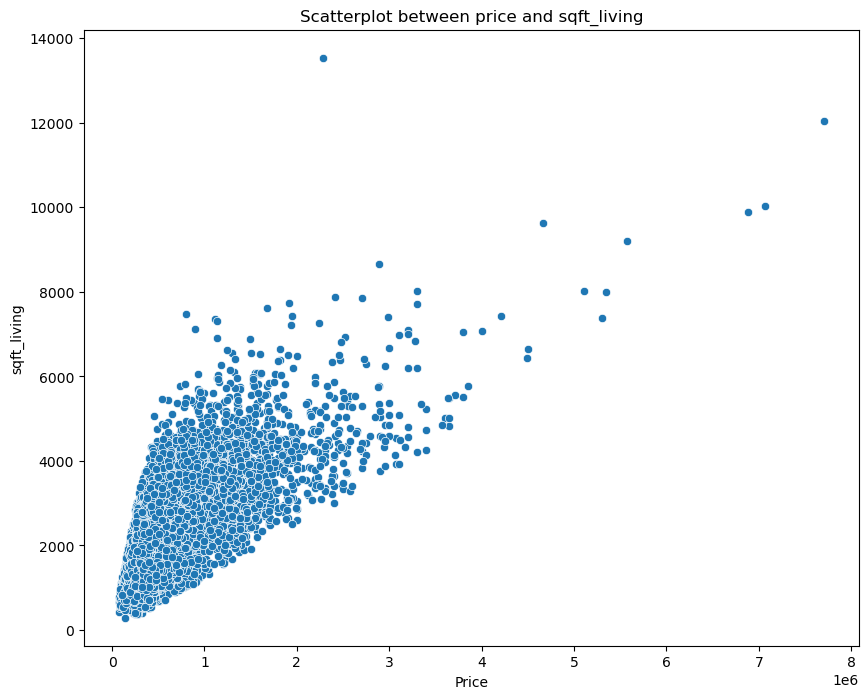

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='sqft_living',data=df)
plt.xlabel("Price")
plt.ylabel("sqft_living")
plt.title("Scatterplot between price and sqft_living")
plt.show()

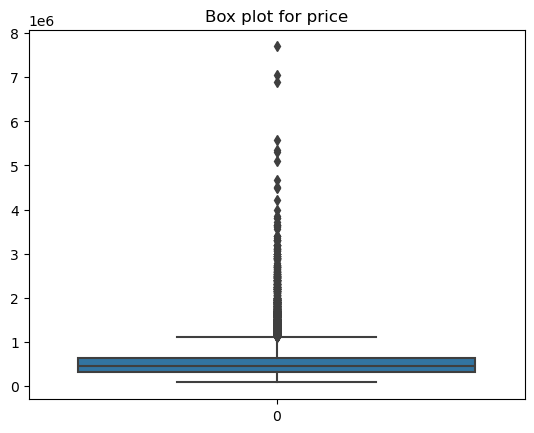

In [34]:
sns.boxplot(df['price'])
plt.title("Box plot for price")
plt.show()

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


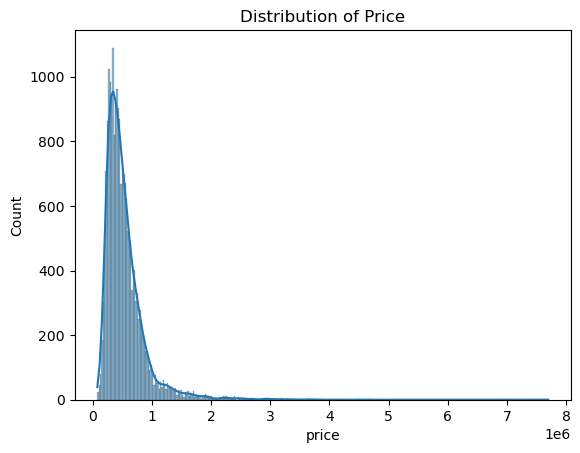

In [35]:
sns.histplot(df['price'],kde=True)
plt.title("Distribution of Price")
plt.show()

We can see that we have outliers with price feature and is also right skewed

In [36]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

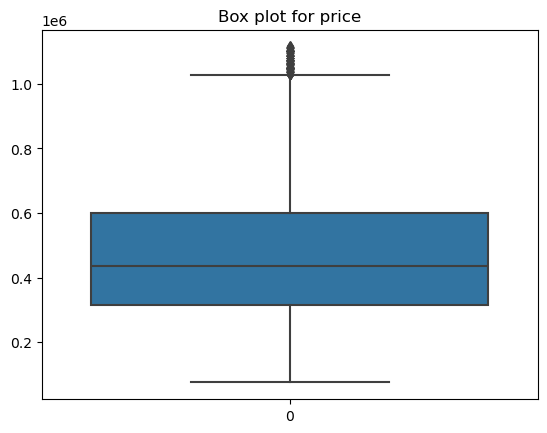

In [37]:
sns.boxplot(df['price'])
plt.title("Box plot for price")
plt.show()

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


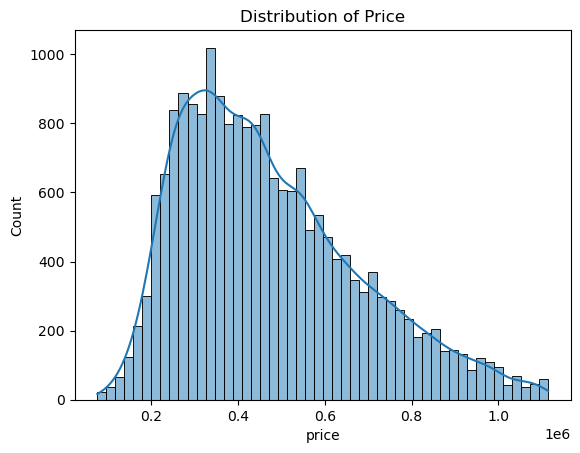

In [38]:
sns.histplot(df['price'],kde=True)
plt.title("Distribution of Price")
plt.show()

In [39]:
df['sqrt_price'] = np.sqrt(df['price'])


In [40]:
df['log_price'] = np.log(df['price'] + 1)  # Add 1 to avoid log(0)

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


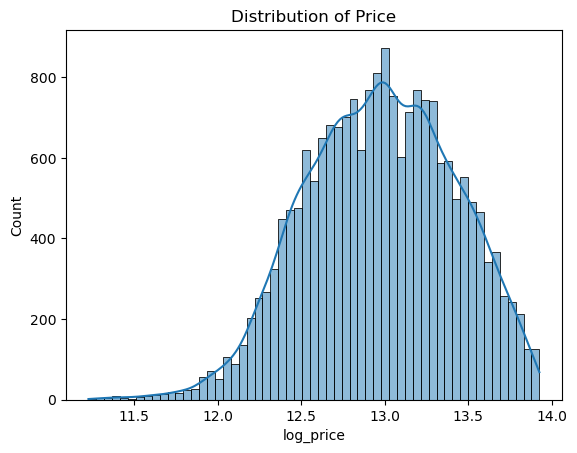

In [41]:
sns.histplot(df['log_price'],kde=True)
plt.title("Distribution of Price")
plt.show()

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


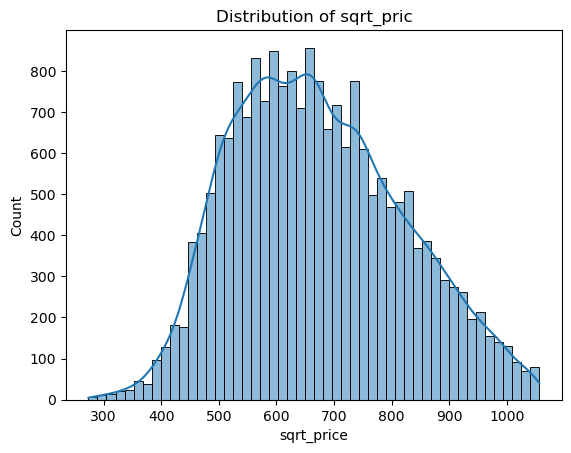

In [42]:
# Effective for moderate right-skewed distributions. It can also be used when 
# you have count data or data with non-negative values.
sns.histplot(df['sqrt_price'],kde=True)
plt.title("Distribution of sqrt_pric")
plt.show()

# We can see that we got the better result with the sqrt_price, so we will keep this and price and log_price will be dropped

In [43]:
df.drop(columns=['price','log_price'],inplace=True)

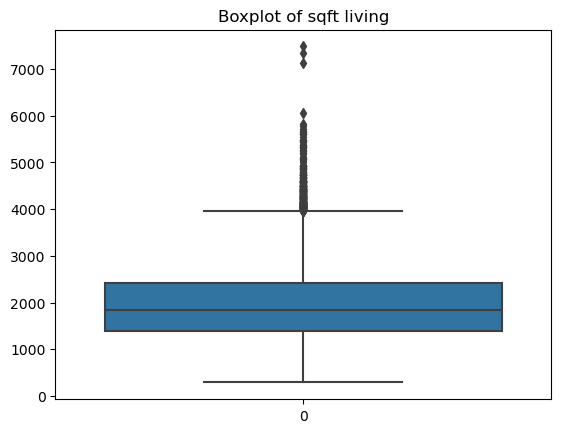

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


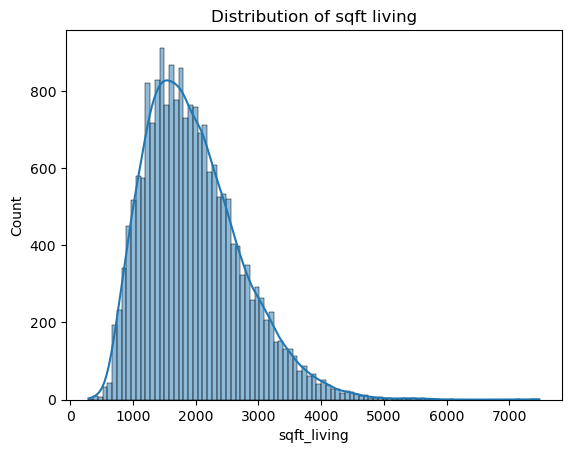

In [44]:
# Now we will check the same things with the sqft_living

sns.boxplot(df['sqft_living'])
plt.title("Boxplot of sqft living")
plt.show()

sns.histplot(df['sqft_living'],kde=True)
plt.title("Distribution of sqft living")
plt.show()


In [45]:
# Handling outliers

Q1=df['sqft_living'].quantile(0.25)
Q3=df['sqft_living'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['sqft_living'] >= lower_bound) & (df['sqft_living'] <= upper_bound)]


In [46]:
df['SQRT_sqft_living'] = np.sqrt(df['sqft_living'])


c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


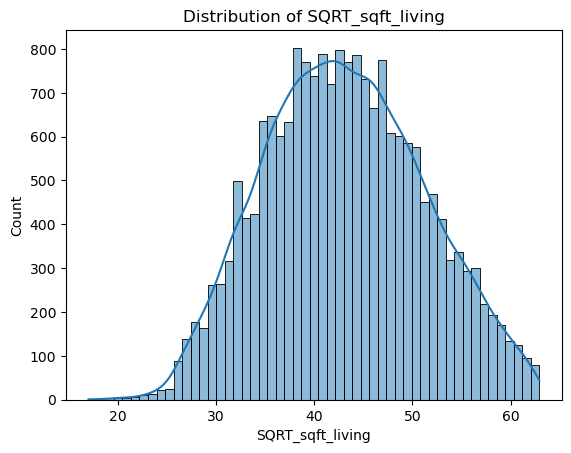

In [47]:
sns.histplot(df['SQRT_sqft_living'],kde=True)
plt.title("Distribution of SQRT_sqft_living")
plt.show()

In [48]:
df.drop(columns=['sqft_living'],inplace=True)

In [49]:
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'price_per_sqFT',
       'house_age', 'sqrt_price', 'SQRT_sqft_living'],
      dtype='object')

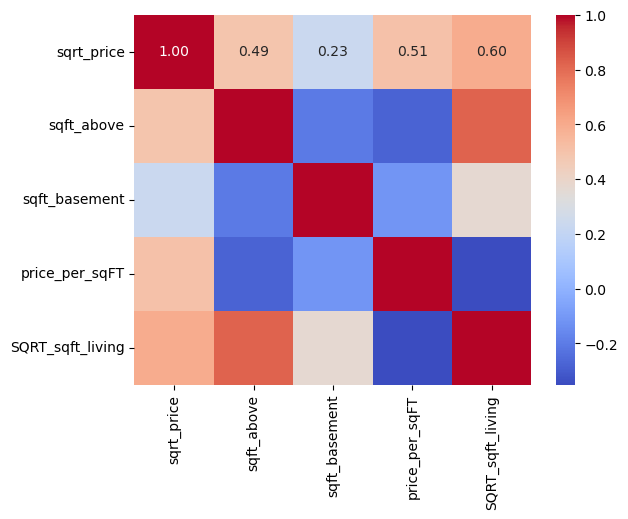

In [50]:
# Calculate the correlation matrix
corr_matrix = df[['sqrt_price', 'sqft_above', 'sqft_basement', 'price_per_sqFT', 'SQRT_sqft_living']].corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [51]:
# Here the sqft_basement shows the least impact on price so we can drop it.
df.drop(columns=['sqft_basement'],inplace=True)

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


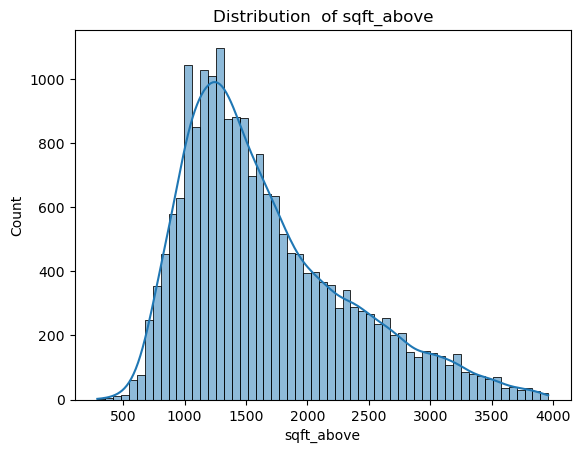

In [52]:
sns.histplot(df['sqft_above'],kde=True)
plt.title("Distribution  of sqft_above")
plt.show()

In [53]:
df['log_sqft_above']=np.log(df['sqft_above'])

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


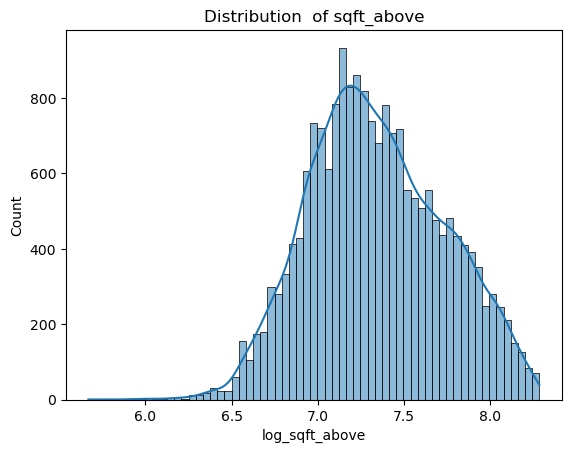

In [54]:
sns.histplot(df['log_sqft_above'],kde=True)
plt.title("Distribution  of sqft_above")
plt.show()

In [55]:
df.drop(columns=['sqft_above'],inplace=True)

In [56]:
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'price_per_sqFT', 'house_age', 'sqrt_price',
       'SQRT_sqft_living', 'log_sqft_above'],
      dtype='object')

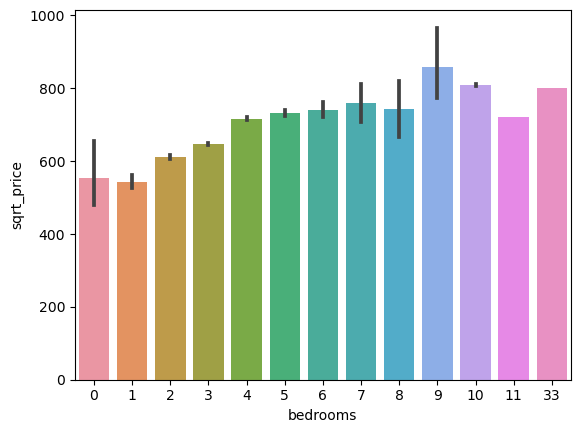

In [57]:
sns.barplot(x='bedrooms',y='sqrt_price',data=df)
plt.show()

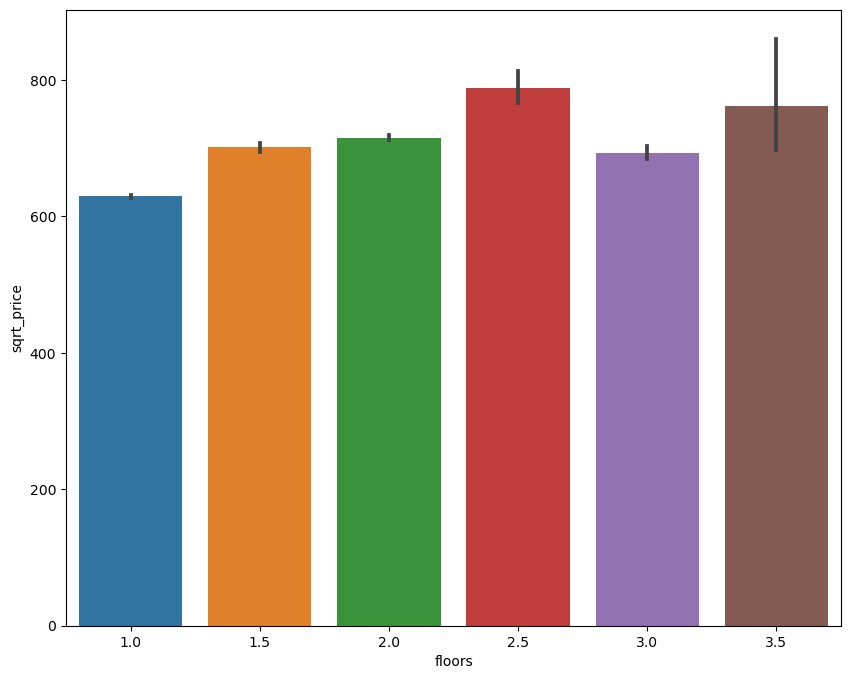

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='floors',y='sqrt_price',data=df)
plt.show()

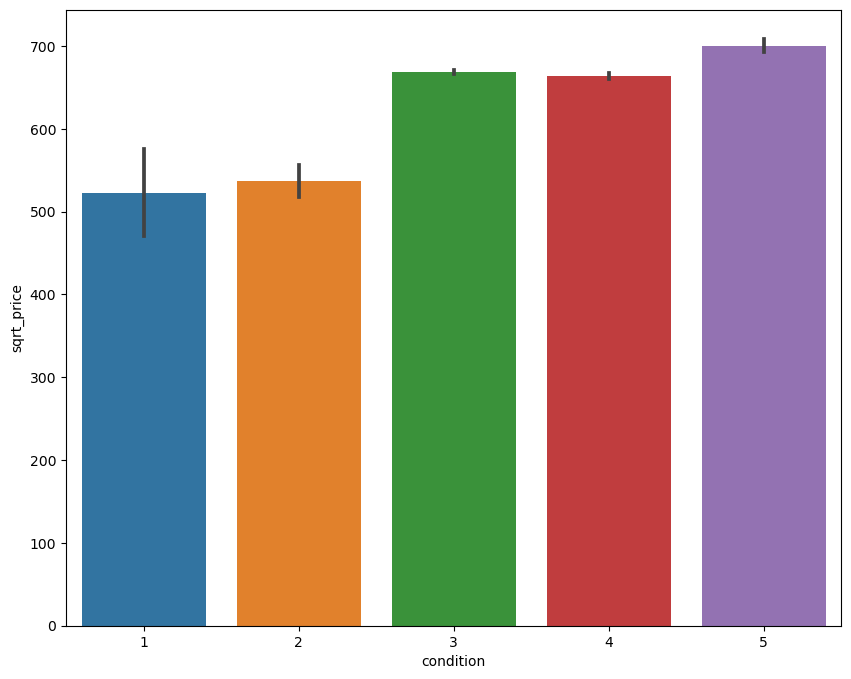

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x='condition',y='sqrt_price',data=df)
plt.show()

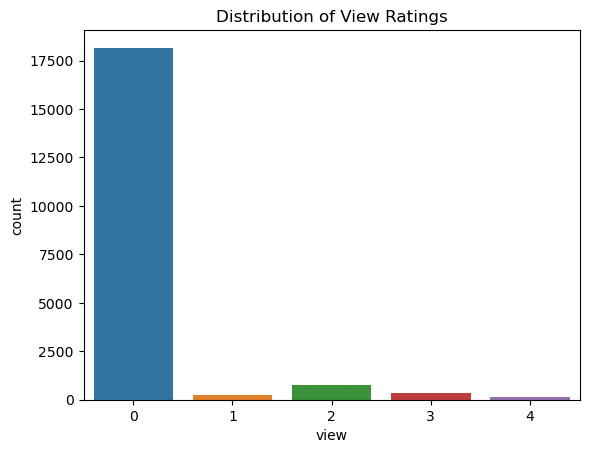

In [60]:
sns.countplot(x=df['view'])
plt.title('Distribution of View Ratings')
plt.show()


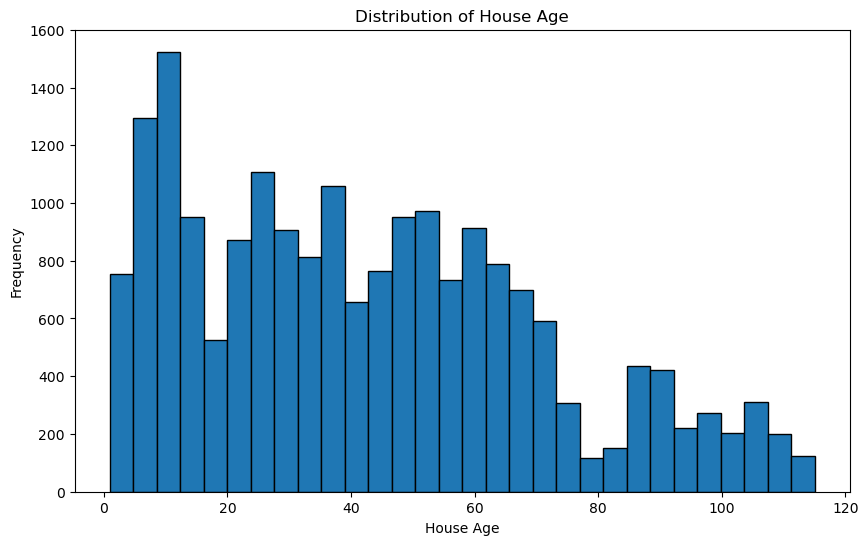

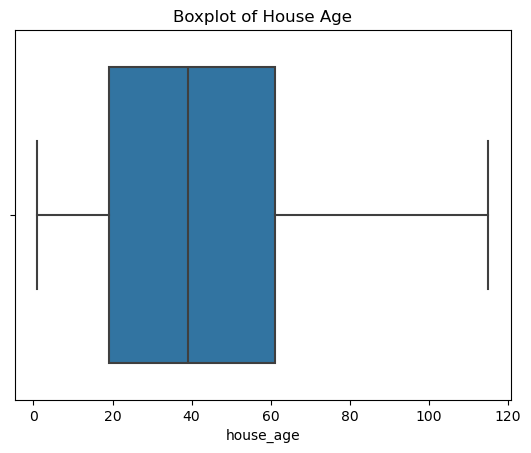

In [61]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['house_age'], bins=30, edgecolor='black')
plt.title('Distribution of House Age')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()


sns.boxplot(x=df['house_age'])
plt.title('Boxplot of House Age')
plt.show()

In [62]:
df.head(10)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,price_per_sqFT,house_age,sqrt_price,SQRT_sqft_living,log_sqft_above
0,3,1.00,1.0,0,0,3,7,1955,188.050847,59,471.062629,34.351128,7.073270
1,3,2.25,2.0,0,0,3,7,1951,209.338521,23,733.484833,50.695167,7.682482
2,2,1.00,1.0,0,0,3,6,1933,233.766234,82,424.264069,27.748874,6.646391
3,4,3.00,1.0,0,0,5,7,1965,308.163265,49,777.174369,44.271887,6.956545
4,3,2.00,1.0,0,0,3,8,1987,303.571429,28,714.142843,40.987803,7.426549
6,3,2.25,2.0,0,0,3,7,1995,150.145773,19,507.444578,41.412558,7.447168
7,3,1.50,1.0,0,0,3,7,1963,275.330189,52,540.231432,32.557641,6.966024
8,3,1.00,1.0,0,0,3,7,1960,128.932584,55,479.061583,42.190046,6.956545
9,3,2.50,2.0,0,0,3,7,2003,170.899471,12,568.330890,43.474130,7.544332
10,3,2.50,1.0,0,0,3,8,1965,186.095506,50,813.941030,59.665736,7.528332


In [63]:
mean_price_waterfont=df.groupby('waterfront')['sqrt_price'].mean()

In [64]:
print("Mean price by waterfront:")
print(mean_price_waterfont)

Mean price by waterfront:
waterfront
0    667.932908
1    806.252861
Name: sqrt_price, dtype: float64


In [65]:
median_price_waterfront = df.groupby('waterfront')['sqrt_price'].median()
print("\nMedian price by waterfront:")
print(median_price_waterfront)


Median price by waterfront:
waterfront
0    655.743852
1    807.773239
Name: sqrt_price, dtype: float64


Observation-----There is a clear difference in mean/median prices between properties with and without a waterfront view. Properties with a waterfront view have a higher mean price.

In [66]:
mean_view_price=df.groupby('view')['sqrt_price'].mean()
print("mean of view is:")
print(mean_view_price)

mean of view is:
view
0    658.774863
1    776.407799
2    769.827382
3    794.228185
4    864.183404
Name: sqrt_price, dtype: float64


In [67]:
median_view_price=df.groupby('view')['sqrt_price'].median()
print("median of view is:")
print(median_view_price)

median of view is:
view
0    648.074070
1    781.373814
2    771.362431
3    804.362141
4    880.340843
Name: sqrt_price, dtype: float64


In [68]:
mean_condition_price=df.groupby('condition')['sqrt_price'].mean()
print("meanof condition price is:")
print(mean_condition_price)

meanof condition price is:
condition
1    522.069890
2    536.576880
3    668.569593
4    663.527790
5    700.475242
Name: sqrt_price, dtype: float64


In [69]:
mean_condition_grade=df.groupby('grade')['sqrt_price'].mean()
print("meanof grade price is:")
print(mean_condition_grade)

meanof grade price is:
grade
1     376.828874
3     438.290299
4     452.089998
5     486.221072
6     538.965330
7     622.541837
8     714.512229
9     814.586935
10    888.475285
11    939.845904
Name: sqrt_price, dtype: float64


In [70]:
# Let us check again the correlation for the corelation

In [71]:
corr_matrix=df.corr()
# Correlation with target variable 'sqrt_price'
correlation_with_target = corr_matrix['sqrt_price'].sort_values(ascending=False)

# Display the correlations
print(correlation_with_target)


sqrt_price          1.000000
grade               0.609217
SQRT_sqft_living    0.595143
price_per_sqFT      0.508965
log_sqft_above      0.487736
bathrooms           0.434612
bedrooms            0.276284
floors              0.262620
view                0.229800
condition           0.056129
waterfront          0.052732
yr_built            0.038263
house_age          -0.073917
Name: sqrt_price, dtype: float64


In [72]:

# Set a threshold for high correlation
high_corr_threshold = 0.8

# Find pairs of highly correlated features
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                   if col1 != col2 and np.abs(corr_matrix.loc[col1, col2]) > high_corr_threshold]

# Display highly correlated feature pairs
print(high_corr_pairs)


[('yr_built', 'house_age'), ('house_age', 'yr_built'), ('SQRT_sqft_living', 'log_sqft_above'), ('log_sqft_above', 'SQRT_sqft_living')]


In [73]:
# Now let us remove the feature yr_build and log_sqft_above as we have more meaningful features w.r.t them.
df.drop(columns=['yr_built','log_sqft_above'],inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19652 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          19652 non-null  int64  
 1   bathrooms         19652 non-null  float64
 2   floors            19652 non-null  float64
 3   waterfront        19652 non-null  int64  
 4   view              19652 non-null  int64  
 5   condition         19652 non-null  int64  
 6   grade             19652 non-null  int64  
 7   price_per_sqFT    19652 non-null  float64
 8   house_age         19652 non-null  int64  
 9   sqrt_price        19652 non-null  float64
 10  SQRT_sqft_living  19652 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


# Now let us go for the model building. First we will directly apply the model then we try to improve the model with the different techniques.

In [75]:
X=df.drop('sqrt_price',axis=1)
y=df['sqrt_price']

In [76]:
X.shape,y.shape

((19652, 10), (19652,))

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
X_train.shape,X_test.shape

((15721, 10), (3931, 10))

In [80]:
y_train.shape,y_test.shape

((15721,), (3931,))

In [81]:
base_Linear_model=LinearRegression()

In [82]:
base_Linear_model.fit(X_train,y_train)

LinearRegression()

In [83]:
# Evaluate the Model
y_pred = base_Linear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [84]:
# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1156.5393076468722
Root Mean Squared Error (RMSE): 34.00793007001268
Mean Absolute Error (MAE): 24.353800316817924
R-squared (R²): 0.9435830767905291


# Residual Analysis

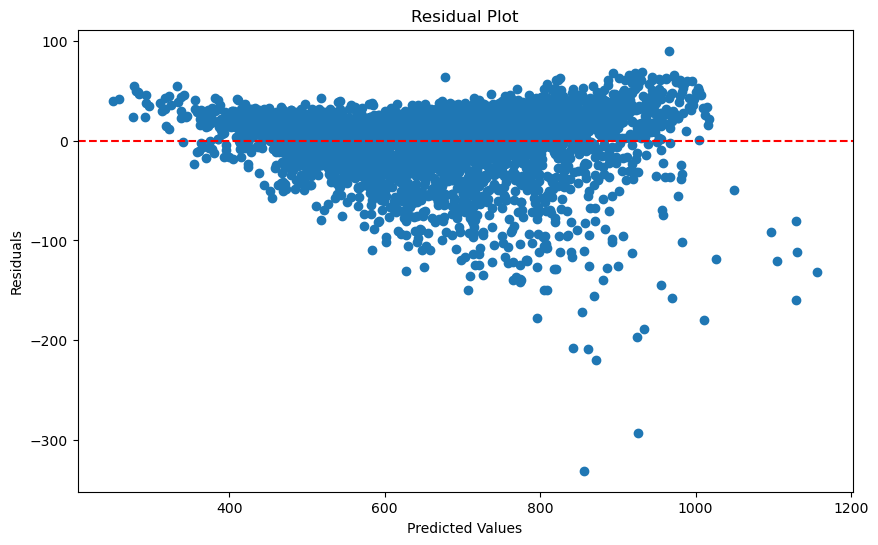

c:\Users\aadil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


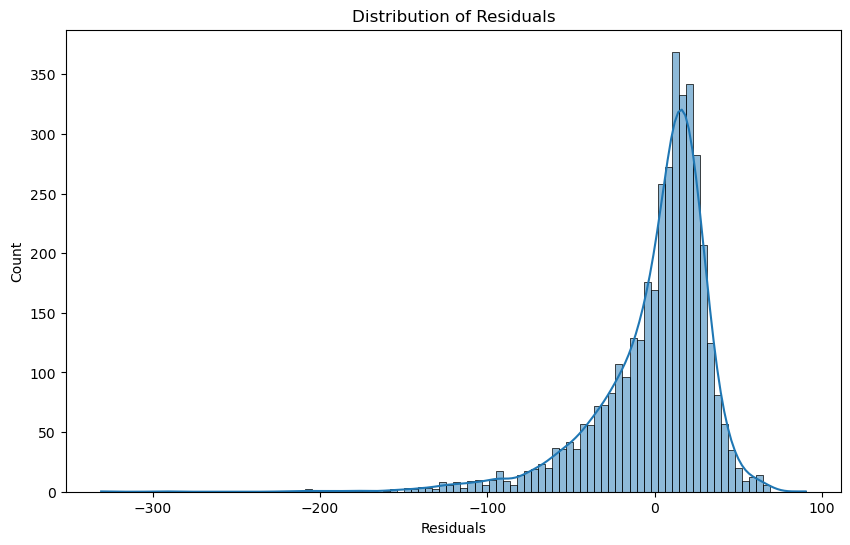

In [85]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [86]:
# Interpret the Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': base_Linear_model.coef_
})

print(coefficients)

            Feature  Coefficient
0          bedrooms     0.626040
1         bathrooms     3.660804
2            floors     0.285231
3        waterfront   -18.421248
4              view     3.811791
5         condition     5.503896
6             grade    11.656673
7    price_per_sqFT     1.135223
8         house_age     0.090043
9  SQRT_sqft_living    14.517456


Waterfront properties have a substantial negative coefficient. This suggests that, surprisingly, having a waterfront decreases the sqrt_price by 18.421 units, holding other factors constant. This might indicate multicollinearity, or it might be an anomaly in your data.

# Let us first see that how our model will behave if we drop this feature entirely

In [87]:
df1=df.drop('waterfront',axis=1)

In [88]:
df1.head()

,bedrooms,bathrooms,floors,view,condition,grade,price_per_sqFT,house_age,sqrt_price,SQRT_sqft_living
0,3,1.00,1.0,0,3,7,188.050847,59,471.062629,34.351128
1,3,2.25,2.0,0,3,7,209.338521,23,733.484833,50.695167
2,2,1.00,1.0,0,3,6,233.766234,82,424.264069,27.748874
3,4,3.00,1.0,0,5,7,308.163265,49,777.174369,44.271887
4,3,2.00,1.0,0,3,8,303.571429,28,714.142843,40.987803


In [89]:
X=df1.drop('sqrt_price',axis=1)
y=df1['sqrt_price']

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [91]:
model2=LinearRegression()

In [92]:
model2.fit(X_train,y_train)

LinearRegression()

In [93]:
# Evaluate the Model
y_pred = model2.predict(X_test)

# Calculate metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1162.2917291439262
Root Mean Squared Error (RMSE): 34.092399873636445
Mean Absolute Error (MAE): 24.522787630737596
R-squared (R²): 0.9429690792346991


In [95]:
# Interpret the Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model2.coef_
})

print(coefficients)

            Feature  Coefficient
0          bedrooms     0.637766
1         bathrooms     4.064708
2            floors     0.666639
3              view     3.013398
4         condition     5.360193
5             grade    11.143899
6    price_per_sqFT     1.137230
7         house_age     0.087774
8  SQRT_sqft_living    14.534210


In [96]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(base_Linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")


Cross-Validation RMSE Scores: [34.9516974  34.54633036 33.95481207 34.97704415 33.59818064]
Mean Cross-Validation RMSE: 34.40561292384434


In [97]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")


Cross-Validation RMSE Scores: [34.9516974  34.54633036 33.95481207 34.97704415 33.59818064]
Mean Cross-Validation RMSE: 34.40561292384434


In [99]:
# Let us go for the hyper parameter tunning of the Linear regression.
from sklearn.linear_model import Ridge
ridge_model=Ridge()


In [100]:
ridge_model.fit(X_train,y_train)

Ridge()

In [101]:
y_pred_ridge=ridge_model.predict(X_test)

In [107]:
# Compute metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression MAE: {mae_ridge}")
print(f"Ridge Regression R²: {r2_ridge}")

Ridge Regression MSE: 1162.291706549676
Ridge Regression RMSE: 34.092399542268595
Ridge Regression MAE: 24.52277194032281
Ridge Regression R²: 0.9429690803433458


In [103]:
from sklearn.linear_model import Lasso
Lasso_model=Lasso()

In [104]:
Lasso_model.fit(X_train,y_train)

Lasso()

In [105]:
y_pred_lasso=Lasso_model.predict(X_test)

In [108]:
# Compute metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression RMSE: {rmse_lasso}")
print(f"Lasso Regression MAE: {mae_lasso}")
print(f"Lasso Regression R²: {r2_lasso}")

Lasso Regression MSE: 1172.8030159016585
Lasso Regression RMSE: 34.246211701466464
Lasso Regression MAE: 24.57550738265299
Lasso Regression R²: 0.9424533151221358


In [109]:
from sklearn.linear_model import ElasticNet
ElasticNet_model=ElasticNet()

In [110]:
ElasticNet_model.fit(X_train,y_train)

ElasticNet()

In [111]:
y_pred_elasticNet=ElasticNet_model.predict(X_test)

In [112]:
# Compute metrics
mse_elasticNet = mean_squared_error(y_test, y_pred_elasticNet)
rmse_elasticNet = np.sqrt(mse_elasticNet)
mae_elasticNet = mean_absolute_error(y_test, y_pred_elasticNet)
r2_elasticNet = r2_score(y_test, y_pred_elasticNet)

print(f"Lasso Regression MSE: {mse_elasticNet}")
print(f"Lasso Regression RMSE: {rmse_elasticNet}")
print(f"Lasso Regression MAE: {mae_elasticNet}")
print(f"Lasso Regression R²: {r2_elasticNet}")

Lasso Regression MSE: 1186.6916318646508
Lasso Regression RMSE: 34.448390845794975
Lasso Regression MAE: 24.643141513409716
Lasso Regression R²: 0.9417718334109061
